# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [25]:
import pandas as pd
df = pd.read_csv('./data/data_multi.csv')

In [26]:
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
5,1.943621,-1.173123,-51.806001
6,-1.602058,0.625231,82.457071
7,-0.401781,0.177426,-10.956509
8,-0.977278,1.867558,184.086053
9,0.378163,0.154947,13.651390


In [27]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [36]:
import pandas as pd
import numpy as np

y_target= np.array(df.y)
X_features = np.array([[df.x_1], [df.x_2]])
print(y_target)


[ -81.46443256  -78.75279511    2.21841364   52.23416022 -159.63925844
  -51.80600085   82.45707052  -10.95650889  184.08605329   13.65139024
  -47.35779025  -71.20407441  -15.05942454  116.1576248   -12.00536969
  170.30565126  -80.97261983   70.9876416    87.31109827 -104.88568957
  -87.88833348   40.05238643  -43.24060741  -43.83757273  -83.3523105
  -95.25314681 -111.16552786  -38.74985337   28.78287221  -30.14095628
   -8.02127381 -207.68577019 -117.91250074  118.36250221  -17.52468677
   21.27048262   39.10287929  221.25263463  -20.04057412   15.90474192
  104.32394977  -76.73337957   62.81281233  124.49121049  194.56190862
  -32.3369787    10.58976041   30.30410474  -93.06345087  162.03717404
   -4.25329248  -78.93288554  -82.45604339  -43.4715363     7.83363462
  152.43413247  -89.07396641  226.95963523  -34.9725708    32.0445009
 -143.77843204  -75.73140902 -113.97274042  -53.34974102  -48.59256647
  -72.93706549  146.12499132   97.33802039  258.23754563 -117.52036937
  248.97

In [38]:
print(X_features)
X_features.shape
#y_target.shape

[[[ 1.05445173 -0.36274117 -0.85409574  1.3263859  -0.4615846
    1.94362119 -1.60205766 -0.40178094 -0.97727788  0.37816252
   -0.30230275 -0.74745481 -0.18718385  0.31872765 -1.53624369
    0.40015721 -0.82643854 -0.74216502  0.70657317  0.90082649
   -0.57884966 -0.20829876  0.68159452  0.8024564   0.77749036
   -1.5447711   0.96939671  0.67643329  1.78587049  1.5430146
    0.05616534 -0.21274028 -0.35955316 -1.23482582  0.15634897
    0.4105985  -0.15501009  1.20237985  0.40198936 -1.07993151
    0.92220667 -0.68954978 -0.17154633  0.08755124  1.89588918
   -0.66347829  1.84926373  0.33367433 -1.37495129  1.46935877
    0.01747916 -1.18063218  0.26705087  1.11701629  1.45427351
    2.2408932  -0.14963454  0.90604466 -1.1680935  -0.65102559
   -1.98079647 -0.4380743   0.84436298  1.22244507  0.63503144
    0.3869025  -0.20515826  0.12898291  1.33652795  1.9507754
    1.48051479  0.31694261 -2.22340315  1.71334272  0.3024719
    0.12167502 -1.42001794  0.4393917  -0.17992484 -0.68481

(2, 1, 100)

### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

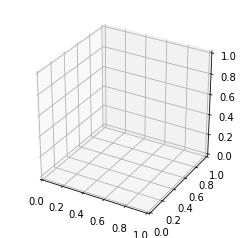

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_features, y_target, ????)
ax.set_title("3D plot") 
plt.show()

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

**Exercise :** Show correlation coefficients. 

In [30]:
import scipy as sc
print(sc.stats.spearmanr(X_features, y_target))
print(sc.stats.pearsonr(X_features, y_target))

SpearmanrResult(correlation=0.2131413141314131, pvalue=0.033242149992682116)
(0.23565036822170068, 0.018264193138231556)


### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [45]:
import sklearn
import numpy as np
from sklearn import datasets
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Load and fit the model (with Sklearn)

How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [31]:

from sklearn.linear_model import LinearRegression

# Choose your test size to split between training and testing sets:

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(y_test)
print(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.2408932   0.42833187  0.96939671 -0.17154633  1.9507754   0.40015721
  0.92220667  0.97663904  0.37816252 -2.22340315 -0.74745481  0.33367433
  0.40746184  1.78587049 -1.45436567  1.94362119 -0.20515826  0.3869025
  0.4105985  -0.82643854  1.46935877  0.15634897 -0.40178094  0.82350415
  0.67643329  0.90082649 -0.15135721 -1.5447711   0.84436298  0.31872765
  0.77749036  1.3263859  -0.74216502  0.40198936 -0.97727788 -0.17992484
 -1.60205766  0.63503144 -0.15501009  0.6536186  -0.14963454 -1.7262826
  1.45427351  0.08755124  0.01747916  0.12898291  1.84926373  1.33652795
 -0.4380743  -1.34775906 -0.68481009 -0.68954978 -1.1680935  -1.37495129
  0.05216508  0.90604466  0.12167502 -0.35955316  0.46278226 -0.65102559
  1.22244507 -1.09306151  1.20237985  1.5430146  -0.36274117  0.26705087
 -0.20829876 -0.85409574  0.8024564   1.91006495  0.03183056  0.3024719
  0.53924919 -0.43782004 -0.57884966 -1.98079647  0.31694261 -1.53624369
  1.92953205 -1.18063218].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_train)

r2_score(y_train, y_pred)

In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [49]:
import pandas as pd
df = pd.read_csv('./data/data_multi.csv')
X1 = np.array(df.x_1, df.x_2)
X2 = np.ones(100)
X=[X1,X2]
X = np.vstack((X1, X2))
X=X.T


In [51]:
#print(X)



F = np.matmul(X,theta)

(100, 2)


ValueError: shapes (100,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [52]:
print(X.shape) # X is a 100*3 matrix

(100, 2)


**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [50]:
theta = np.random.random(3)

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [ ]:
model = lambda X, theta: X.dot(theta)

In [ ]:
#another method
#def model(X,theta):
    #F = np.matmul(X,theta)
    #return F

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [ ]:
#m= y.size # number of training examples
def MSE(X,y,theta):
    m=len(X)
    mse=1/(2*m) * sum((np.dot(X , theta) - y)**2)
    return mse

In [ ]:
MSE(X, y,theta)

NameError: name 'theta' is not defined

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [ ]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
grad(X, y, theta)

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [ ]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        print(i)
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = MSE(X,y,theta) # values of MSE
        
         #cost_history.append(computeCost(X, y, theta))
    return theta, cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [ ]:
n_iterations = 1000
learning_rate = 0.01 #alpha


NameError: name 'y_target' is not defined

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [ ]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [ ]:
predictions=model(X, theta_final)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

**Exercise :** Plot `cost_history`.

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title('cost_history')
plt.ylabel('Theta')
plt.xlabel('Iterations')
_=ax.plot(range(n_iterations),cost_history,'b.')

### Evaluation

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

y    0.93205
dtype: float64

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">